In [2]:
import geopandas as gp

In [10]:
from pyspark.sql.functions import lit
from pyspark.sql import SQLContext
import pyspark
import unicodedata
import pandas as pd

In [4]:
#création des contextes
sc = pyspark.SparkContext()
sql_c = SQLContext(sc)

In [5]:
#méthode pour créer les data frame, loc prend le nom du fichier et deli le delimiter 
def make_df(loc, deli) :
    #172.17.0.2 ip du docker, 8020 port du name node, /user/cloudera/projet_raw chemin jusqu'a mon fichier dans hdfs
    file_location = "hdfs://172.17.0.3:8020/user/cloudera/Projet/output/"+loc
    file_type = 'csv'
    # CSV options
    infer_schema = "true"
    first_row_is_header = "true"

    # The applied options are for CSV files. For other file types, these will be ignored.
    df = sql_c.read.format(file_type) \
    .option("inferSchema", infer_schema) \
    .option("header", first_row_is_header) \
    .option("sep", deli) \
    .load(file_location)
    return df

In [6]:
df_caracteristics = make_df('caracteristics.csv',',')
df_holidays = make_df('holidays.csv',',')
df_places = make_df('places.csv',',')
df_users = make_df('users.csv',',')
df_vehicles = make_df('vehicles.csv',',')

In [7]:
caracteristics = df_caracteristics.toPandas()
holidays = df_holidays.toPandas()
places = df_places.toPandas()
users = df_users.toPandas()
vehicles = df_vehicles.toPandas()


In [8]:
Mapping = {
    'Num_Acc':'AccidentID',
    'jour':'Day',
    'mois':'Month',
    'an':'Year',
    'hrmn':'Hour',
    'lum':'LightingCondition',
    'dep':'Department',
    'com':'Municipality',
    'agg':'Localisation',
    'int':'Intersection',
    'atm':'AtmosphericCondition',
    'col':'CollisionType',
    'adr':'Address',
    'gps':'GpsCoding',
    'lat':'Latitude',
    'long':'Longitude',
    'catr':'RoadCategory',
    'voie':'RoadNumber',
    'v1':'RouteNumber',
    'v2':'RouteName',
    'circ':'TrafficType',
    'nbv':'NumberofLanes',
    'vosp':'OuterLane',
    'Prof':'RoadProfile',
    'pr':'HomePRNumber',
    'pr1':'PRDistance',
    'plan':'LaneStructure',
    'lartpc':'CentralLaneWidth',
    'larrout':'OuterLaneWidth',
    'surf':'SurfaceCondition',
    'infra':'Infrastructure',
    'situ':'SituationofAccident',
    'env1':'SchoolPoint',
    'Acc_number':'AccidentID',
    'Num_Veh':'NumberOfVehicles',
    'place':'Place',
    'catu':'UserCatagory',
    'grav':'Severity ',
    'Year_on':'UserYoB',
    'locp':'Locationofpedestrian',
    'actp':'Actionofpedestrian',
    'etatp':'PedestrianGroup',
    'sexe' : 'Sex',
    'secu':'SafetyEquipment'
}

caracteristics.rename(index=str, columns=Mapping, inplace=True)
holidays.rename(index=str, columns=Mapping, inplace=True)
places.rename(index=str, columns=Mapping, inplace=True)
users.rename(index=str, columns=Mapping, inplace=True)
vehicles.rename(index=str, columns=Mapping, inplace=True)

In [15]:
caracteristics['Year'] = caracteristics.Year + 2000
for name in ['Year','Month','Day']:
    caracteristics[name] = caracteristics[name].astype('str')

TypeError: must be str, not int

In [16]:
caracteristics['Date'] = caracteristics.Year + '-' + caracteristics.Month + '-' + caracteristics.Day
caracteristics['Date'] = pd.to_datetime(caracteristics.Date, format='%Y-%m-%d')
caracteristics.drop(['Year','Month', 'Day', 'Hour'], axis=1, inplace=True)

In [18]:
caracteristics.head(500)

,AccidentID,LightingCondition,Localisation,Intersection,AtmosphericCondition,CollisionType,Municipality,Address,GpsCoding,Latitude,Longitude,Department,Date
0,201600000001,1,2,1,8,3,5,"46, rue Sonneville",M,0,0,590,2016-02-01
1,201600000002,1,2,6,1,6,5,1a rue du cimeti�re,M,0,0,590,2016-03-16
2,201600000003,1,1,1,1,6,11,None,M,0,0,590,2016-07-13
3,201600000004,2,2,1,7,3,477,52 rue victor hugo,M,0,0,590,2016-08-15
4,201600000005,1,2,3,1,3,11,rue Joliot curie,M,0,0,590,2016-12-23
5,201600000006,1,2,1,7,6,11,Rue Jean-baptiste LEBAS,M,0,0,590,2016-12-23
6,201600000007,1,2,1,7,2,51,rue Jules FERRY,M,0,0,590,2016-05-01
7,201600000008,2,1,1,1,1,250,None,M,0,0,590,2016-05-14
8,201600000009,1,2,1,1,3,51,rn41,M,0,0,590,2016-09-23
9,201600000010,1,1,1,9,6,303,None,M,0,0,590,2016-12-30


In [130]:
DF_ML=caracteristics.groupby(['Date']).size().to_frame('NombreAccident').reset_index().set_index('Date',drop=True)
DF_ML

,NombreAccident
Date,
2005-01-01,180
2005-01-02,137
2005-01-03,234
2005-01-04,279
2005-01-05,270
2005-01-06,281
2005-01-07,271
2005-01-08,199
2005-01-09,164


In [20]:
# dataframe
import pandas as pd# maths
import numpy as np# graphes
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FixedLocator# Visualisation des données statistiques :
import seaborn as sns# Construire une palette de couleur :
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap# Operating System - recherche de fichiers
import os# Regular Expression
import re# Date
import datetime
import matplotlib.dates as mdates# geolocalisation
import geopandas as gpd
import shapely
from shapely.geometry import Point

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [21]:
from sklearn.metrics import mean_squared_error

In [99]:
X = difference(DF_ML.values)

In [100]:
size = int(len(X)*0.66)
train, test = X[0:size], X[size:]

In [102]:
print(X)

[[-43]
 [ 97]
 [ 45]
 ...
 [-29]
 [ 15]
 [-33]]


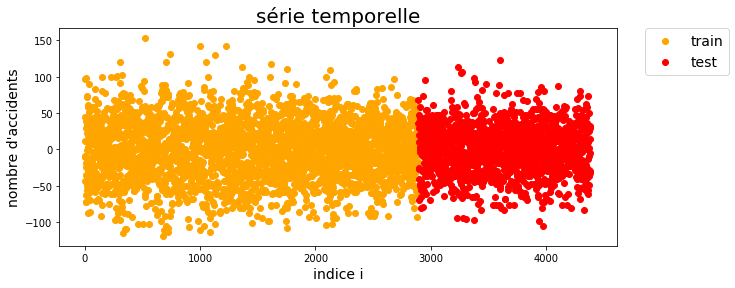

In [103]:
fig, ax = plt.subplots(figsize=(10, 4))
num_train = range(0,len(train))
num_test = range(len(train),len(test)+len(train))
plt.scatter(num_train,train, color = 'orange', label = 'train')
plt.scatter(num_test,test, color = 'red', label = 'test')
plt.xlabel('indice i', size = 14)
plt.ylabel("nombre d'accidents", size = 14)
ax.set_title('série temporelle', size = 20)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.,fontsize = 14)
plt.show()

In [117]:
# import de l'algorithme :
from statsmodels.tsa.ar_model import AR

# import du calcul d'erreur, la distance carrée à la moyenne (MSE) :
from sklearn.metrics import mean_squared_error

In [118]:
 #entraînement de l'alorithme sur la partie "train" du jeu de données :

# application de quel model sur quel jeu de données
model = AR(train)

# ajustement des paramètres affines
window_size = 8              # définition de la fenêtre (nombre de valeurs précédentes à considérer)
model_fit = model.fit(window_size, disp = False)

In [119]:
# les paramètres du modèle : fenêtre et coefficients
print('nombre de valeur précédentes considérées :',model_fit.k_ar)
print('les paramètres affines ajustés :',model_fit.params)

nombre de valeur précédentes considérées : 8
les paramètres affines ajustés : [-0.06063099 -0.59332953 -0.51000222 -0.40063213 -0.33620605 -0.40984111
 -0.24624632  0.25229589  0.15661395]


In [120]:
# fonction de prédiction :
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat

In [121]:
# fonction différence (calcul la dérivée) :
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return np.array(diff)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [122]:
# effectuer la prédiction à partie du jeu de donnée "train" :
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(model_fit.params, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)

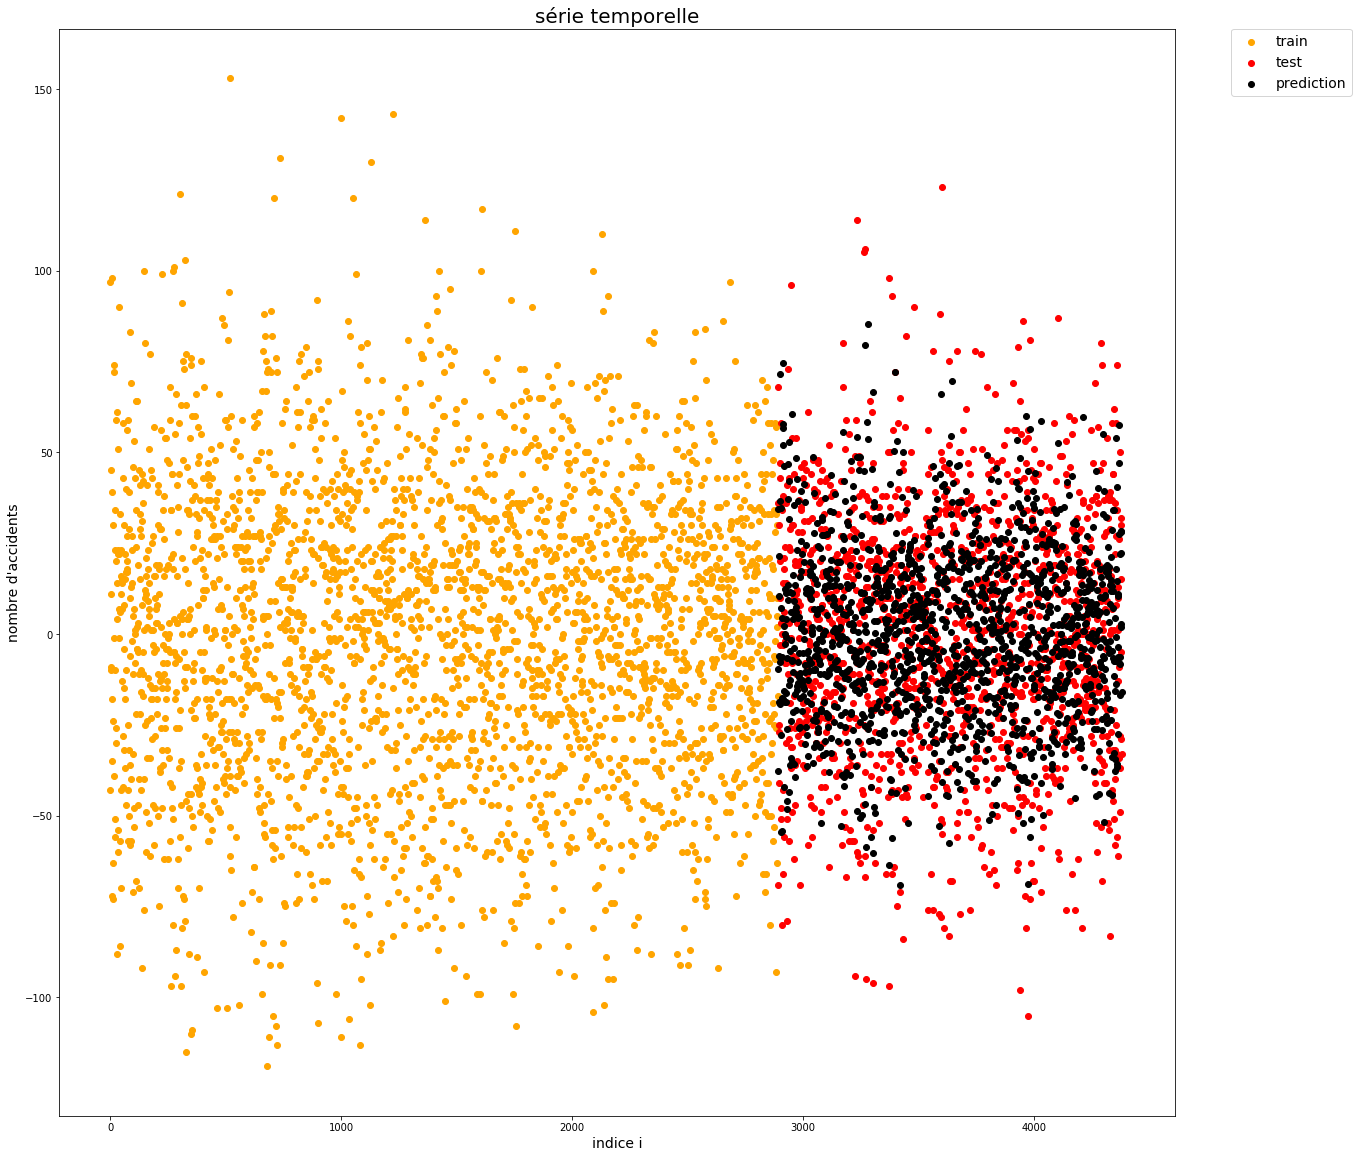

In [123]:
# Visualisation de la prédiction :

fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(num_train,train, color = 'orange', label = "train")
plt.scatter(num_test,test, color = 'red', label = "test")
plt.scatter(num_test,predictions, color = 'black', label = "prediction")

plt.xlabel('indice i', size = 14)
plt.ylabel("nombre d'accidents", size = 14)
ax.set_title('série temporelle', size = 20)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.,fontsize = 14)

plt.show()

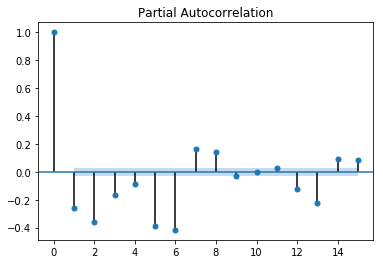

In [124]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(X, lags=15)
plt.show()

In [125]:
# Distance quadratique moyenne entre "test" et "predictions" :
MSE = mean_squared_error(test, predictions)
MSE_unit = np.sqrt(MSE)

In [126]:
# fluctuations des données :
STD = np.std(DF_ML)

In [127]:
# effectuer la prédiction à partie du jeu de donnée "train" :
history = [train.NombreAccident[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(model_fit.params, history)
	obs = test.NombreAccident[t]
	predictions.append(yhat)
	history.append(obs)

AttributeError: 'numpy.ndarray' object has no attribute 'NombreAccident'

In [ ]:
# Distance quadratique moyenne entre "test" et "predictions" :
MSE = mean_squared_error(test, predictions)
MSE_unit = np.sqrt(MSE)

In [128]:
# estimation de l'erreur :
print("Distance quadratique moyenne = %.3f" % MSE_unit, "accidents")
print("Fluctuations = %.3f" % STD, "accidents")

Distance quadratique moyenne = 25.233 accidents
Fluctuations = 47.523 accidents


In [129]:
# Comparaison avec les fluctuations : puissance de prédiction du modèle (R2score) :
Prec_fluc = abs(100*(STD**2 - MSE)/STD**2)
print("Rapport erreur / fluctuations = %.3f" % Prec_fluc, "%")

Rapport erreur / fluctuations = 71.808 %


In [ ]:
# Visualisation de la prédiction :

fig, ax = plt.subplots(figsize=(20, 20))

plt.plot(num_train,train, color = 'orange', label = "train")
plt.plot(num_test,test, color = 'red', label = "test")
plt.plot(num_test,predictions, color = 'black', label = "prediction")

plt.xlabel('indice i', size = 14)
plt.ylabel("nombre d'accidents", size = 14)
ax.set_title('série temporelle', size = 20)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.,fontsize = 14)

plt.show()